# Indian food analysis



In [1]:
# loading the libraries
library(tidyverse)
library(data.table)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘data.table’

The following objects are masked from ‘package:dplyr’:

    between, first, last

The following object is masked from ‘package:purrr’:

    transpose



In [2]:
food_data = fread('indian_food.csv', na.strings = "-1", stringsAsFactors=TRUE)
head(food_data)

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
Ghevar,"Flour, ghee, kewra, milk, clarified butter, sugar, almonds, pistachio, saffron, green cardamom",vegetarian,15,30,sweet,dessert,Rajasthan,West
Gulab jamun,"Milk powder, plain flour, baking powder, ghee, milk, sugar, water, rose water",vegetarian,15,40,sweet,dessert,West Bengal,East
Imarti,"Sugar syrup, lentil flour",vegetarian,10,50,sweet,dessert,West Bengal,East


In [3]:
str(food_data)

Classes ‘data.table’ and 'data.frame':	255 obs. of  9 variables:
 $ name          : Factor w/ 255 levels "Adhirasam","Aloo gobi",..: 14 28 72 77 81 88 89 97 99 112 ...
 $ ingredients   : Factor w/ 252 levels "Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick",..: 123 101 36 96 130 213 124 37 132 134 ...
 $ diet          : Factor w/ 2 levels "non vegetarian",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ prep_time     : int  45 80 15 15 15 10 10 10 20 10 ...
 $ cook_time     : int  25 30 60 30 40 50 50 20 30 40 ...
 $ flavor_profile: Factor w/ 4 levels "bitter","sour",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ course        : Factor w/ 4 levels "dessert","main course",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ state         : Factor w/ 24 levels "Andhra Pradesh",..: 24 18 17 18 24 24 22 NA 24 NA ...
 $ region        : Factor w/ 7 levels "","Central","East",..: 3 7 4 7 3 3 4 NA 3 NA ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [4]:
summary(food_data)

                name    
 Adhirasam        :  1  
 Aloo gobi        :  1  
 Aloo matar       :  1  
 Aloo methi       :  1  
 Aloo shimla mirch:  1  
 Aloo tikki       :  1  
 (Other)          :249  
                                                                    ingredients 
 Arbi ke patte, sesame seeds, gur, bengal gram flour, imli                :  2  
 Chhena, sugar, ghee                                                      :  2  
 Gram flour, ghee, sugar                                                  :  2  
 Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick                    :  1  
 Aloo, urad dal, mustard, ginger, curry leaves                            :  1  
 Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili:  1  
 (Other)                                                                  :246  
             diet       prep_time        cook_time      flavor_profile
 non vegetarian: 29   Min.   :  5.00   Min.   :  2.00   bitter:  4    
 vegetaria

#### Remarks

- The number of vegetarian dishes greatly outnumber the number of non vegetarian dishes

From the data, we can see that the ingredients are written as a single line, separated by commas. To analyze them, we create a function that later helps us separate the ingredients in all lines into a list of ingredients.


In [5]:
# create a function to get all the ingredients
get_ingredient_list <- function(x){
    list_ingre <- unlist(lapply(as.character(x), strsplit, ','))
    list_ingre <- tolower(list_ingre)
    list_ingre <- as.data.frame(table(list_ingre))
    list_ingre <- arrange(list_ingre,desc(Freq))
    #list_ingre <- list_ingre[1:20,]
    return(list_ingre)
}
get_top_ingredient_list <- function(x){
    list_ingre <- get_ingredient_list(x)
    list_ingre <- list_ingre[1:20,]
}
all_ingredients <- get_top_ingredient_list(food_data$ingredients)

In [6]:
library(wordcloud)

Loading required package: RColorBrewer


In [7]:
word <- get_ingredient_list(food_data$ingredients)$list_ingre
word <- paste(word, collapse = " ")
res <- unlist(strsplit(word," "))
res <- res[res != ""]
res <- table(res)
word <- names(res)

In [8]:
freq_table <- sapply(res, function(x) round(x/sum(res), 5))

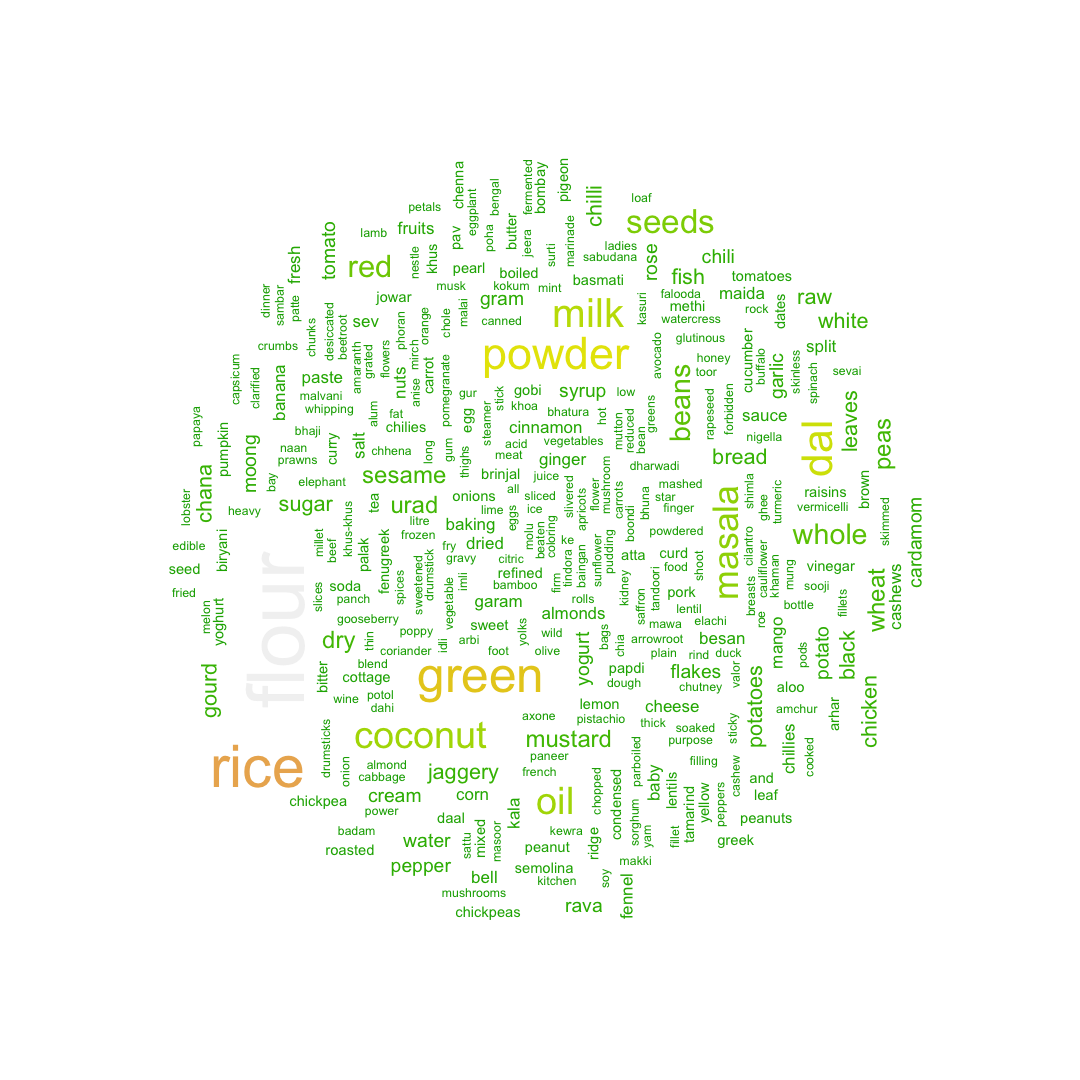

In [9]:
options(repr.plot.width=9, repr.plot.height=9)
wordcloud(word, freq_table, scale=c(4,.5), 
           random.order=TRUE,rot.per=.5, col=terrain.colors(length(res) , alpha=1))

The wordcloud gives us an overview of all the ingredients used in the Indian dishes, we can see that Indian use a lot of flour, powder, and  rice, masala, coconut, dal, which explains for their two most preferred flavors, spicy and sweet. 

## Explortory data analysis

### Cooking and preparation time

Besides, there are NA values that we need to replace or impute. Before doing so, I would like to take quick exploratory analysis with the data.
Firstly, we explore our 2 numerical variables: prep time and cook time

Warning message:
“Removed 30 rows containing non-finite values (stat_bin).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   10.00   10.00   35.39   20.00  500.00      30 

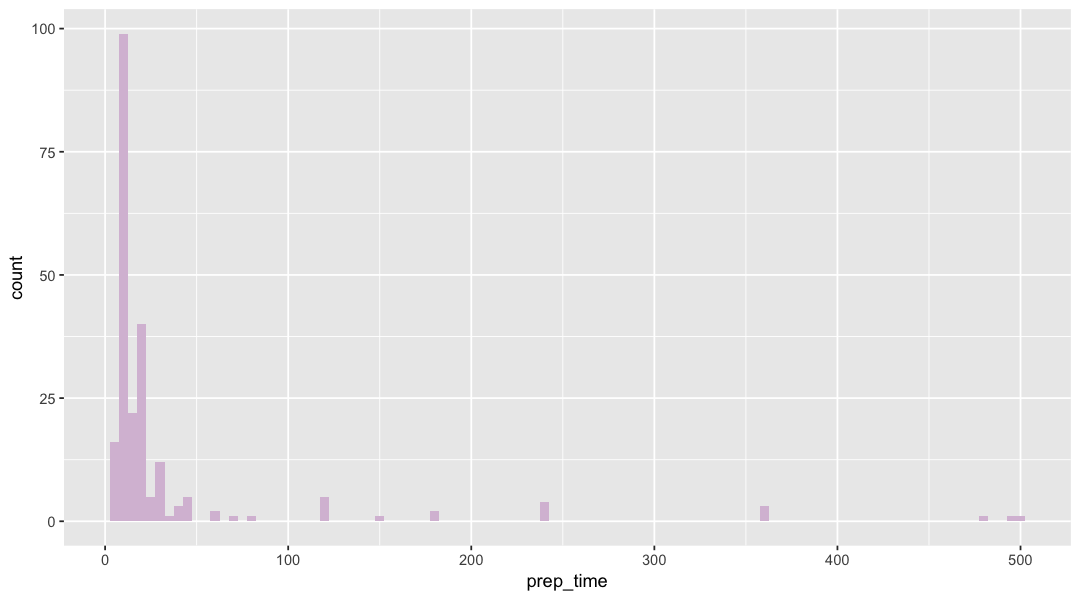

In [10]:
options(repr.plot.width=9, repr.plot.height=5)
ggplot(food_data, aes(x=prep_time))+geom_histogram(binwidth=5, fill="#D8BFD8")
summary(food_data$prep_time)

In [11]:
# take a look at the dishes that have prep time above 300
food_data[prep_time>300]

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Misti doi,"Milk, jaggery",vegetarian,480,30,sweet,dessert,West Bengal,East
Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
Dosa,"Chana dal, urad dal, whole urad dal, blend rice, rock salt",vegetarian,360,90,spicy,snack,NA,South
Idli,"Split urad dal, urad dal, idli rice, thick poha, rock salt",vegetarian,360,90,spicy,snack,NA,South
Masala Dosa,"Chana dal, urad dal, potatoes, idli rice, thick poha",vegetarian,360,90,spicy,snack,NA,South
Puttu,"Brown rice flour, sugar, grated coconut",vegetarian,495,40,NA,main course,Kerala,South


Warning message:
“Removed 28 rows containing non-finite values (stat_bin).”

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   2.00   20.00   30.00   38.91   45.00  720.00      28 

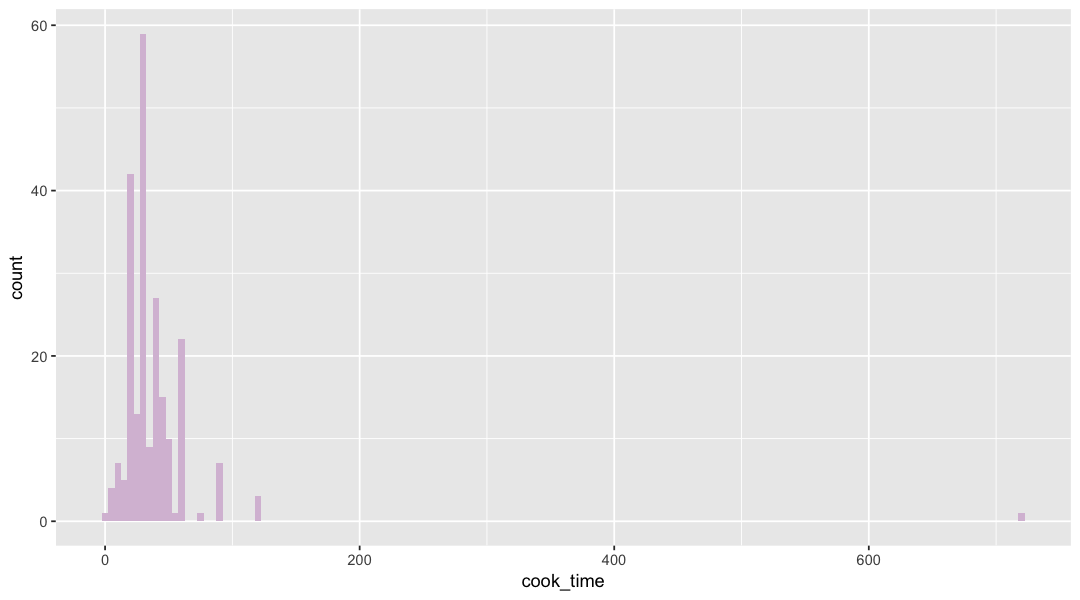

In [12]:
ggplot(food_data, aes(x=cook_time))+geom_histogram(binwidth=5, fill="#D8BFD8")
summary(food_data$cook_time)

In [13]:
# take a look at the dishes that have cook time above 600
food_data[cook_time>600]

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West


#### Remarks

75% of dishes have less than 20 minutes preparation time and 75% of dishes have less than 45 minutes cooking time. However, examining the outlier dishes with either a very high preparation time or cooking time, I can see that the dishes with high preparation time require a lot of cooking time as well, and a dish with significantly long cooking time has very short prep time.

#### Feature engineering - Normalization

To further explore the relationship between them, I normalize the time data, since the cooking time does not have the same distribution as the preparation time

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 2 rows containing missing values (geom_point).”

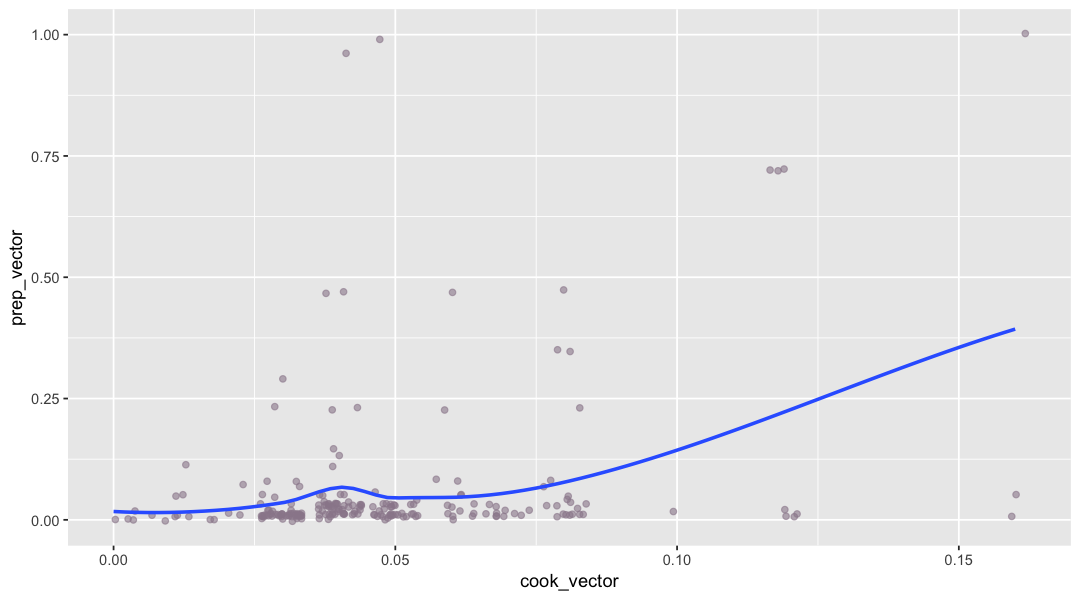

In [14]:
#normalize the cook and prep time 
normalize <- function(vector){
    minimum <- min(vector, na.rm=TRUE)
    maximum <- max(vector, na.rm=TRUE)
    vector <- sapply(vector, function(x) round((x - minimum)/(maximum - minimum),2))
    return(vector)
}

food_data$prep_vector <- normalize(food_data$prep_time)
food_data$cook_vector <- normalize(food_data$cook_time)
                
ggplot(food_data[cook_vector<0.9], aes(x=cook_vector, y=prep_vector))+geom_jitter(col = "#9B889B", alpha=0.6)+geom_smooth(se=FALSE)

Overall, the relationship between the prep and cook time shows two general patterns. Some dishes have the preparation time increasing as the cooking time increases. Most of the dishes, however, have low preparation time for either slow or fast cooking time.

### Now I look into the ingredients

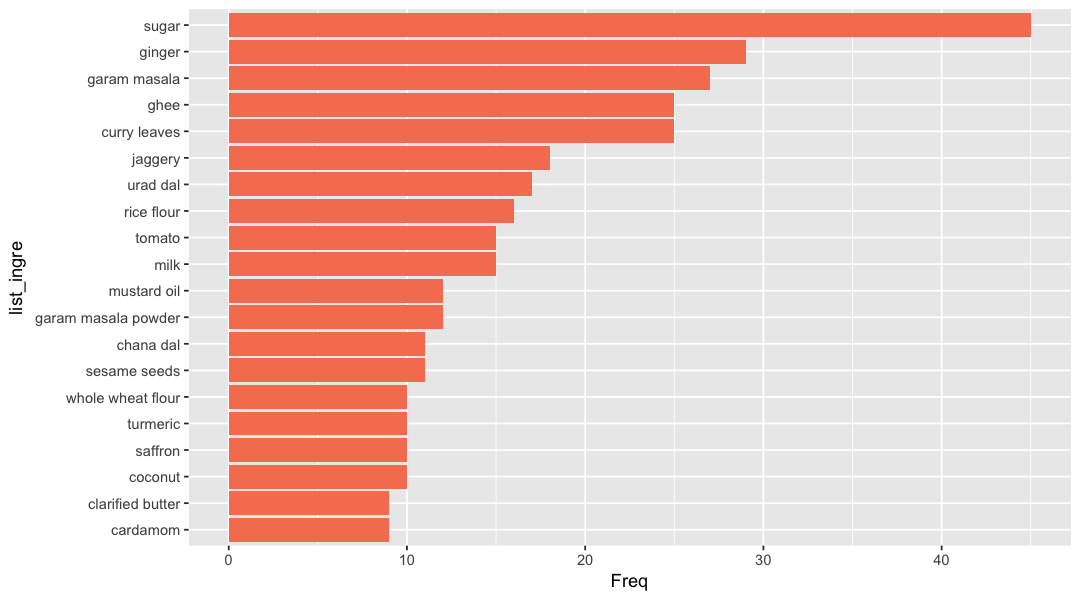

In [15]:
#plotting the 20 most common ingredients used in all dishes
all_ingredients %>%
    mutate(list_ingre = fct_reorder(list_ingre, Freq)) %>%
    ggplot(aes(x=list_ingre, y=Freq))+geom_col(fill="#f68060")+coord_flip()

Interestingly, even though there are approximately 50 more spicy dishes than sweet dishes, the most frequently used ingredient is sugar. Ginger and garam masala, the spice ingredients, come second and third.

### Missing values

There are some missing values in our dataset. To further explore the relationship between variables, we should minimize as many missing values as possible. We will use imputation where relevant to fill the data.

In [16]:
# which variables have NAs?
food_data <- food_data[,-c("prep_vector", "cook_vector")]
colSums(is.na(food_data))

name    ingredients           diet      prep_time      cook_time 
             0              0              0             30             28 
flavor_profile         course          state         region 
            29              0             24             13

#### Firstly, we will impute the preparation time column

We will group the dishes by similar attributes, for which they are likely to have similar approximate prep time, then we will impute them with the median value of prep time of each group. We know from the above analysis that since there are outlier dishes with very low cooking/preparing time, the distributions are highly skewed, so we impute the median value to our missing values instead of the mean values.

Warning message:
“Removed 30 rows containing non-finite values (stat_density).”

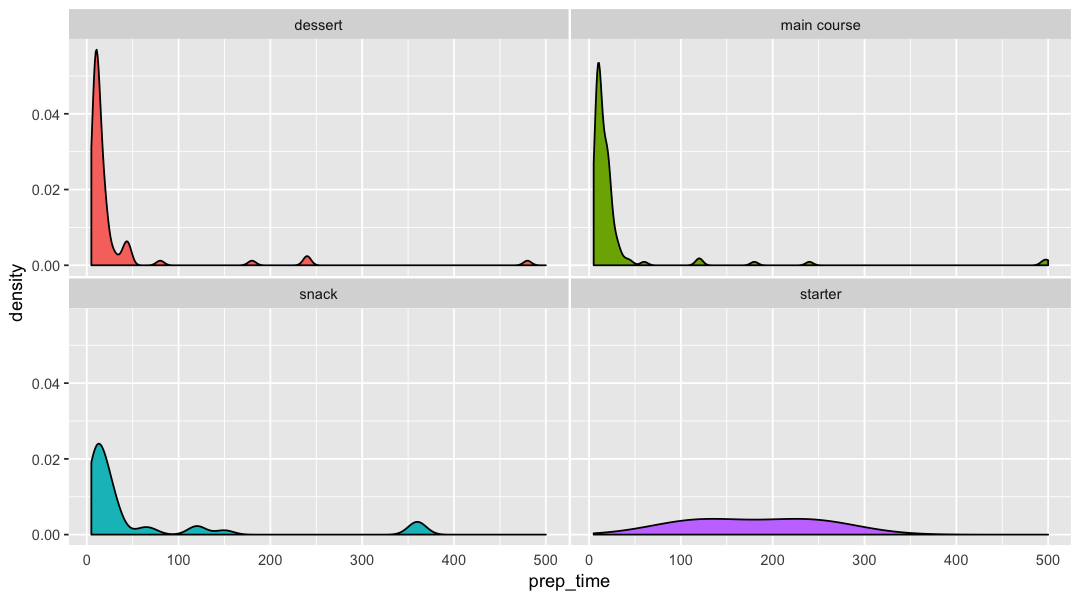

In [17]:
ggplot(data=food_data, aes(x=prep_time, group=course, fill=course)) +
    geom_density(adjust=1.5) +
    facet_wrap(~course) +
    theme(
      legend.position="none",
      panel.spacing = unit(0.1, "lines"),
      axis.ticks.x=element_blank()
    )

In [18]:
head(food_data[is.na(prep_time)])

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,NA,60,sweet,dessert,Maharashtra,West
Chhena kheeri,"Chhena, sugar, milk",vegetarian,NA,60,sweet,dessert,Odisha,East
Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,NA,NA,spicy,main course,Tripura,North East
Kaara kozhambu,"Sesame oil, drumstick, tamarind paste, sambar powder, tomato",vegetarian,NA,NA,spicy,main course,Tamil Nadu,South
Keerai masiyal,"Urad dal, curry leaves, sugar, mustard seeds, spinach",vegetarian,NA,NA,spicy,main course,Tamil Nadu,South
Paravannam,"Raw rice, jaggery, milk",vegetarian,NA,NA,spicy,main course,Kerala,South


In [19]:
# the sweet dessert dishes
head(food_data[flavor_profile=="sweet" & course == "dessert" & is.na(prep_time)])

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Sohan papdi,"Gram flour, ghee, sugar, milk, cardamom",vegetarian,NA,60,sweet,dessert,Maharashtra,West
Chhena kheeri,"Chhena, sugar, milk",vegetarian,NA,60,sweet,dessert,Odisha,East
Halvasan,"Whole wheat rava, chia seed, lemon, edible gum, litre milk",vegetarian,NA,NA,sweet,dessert,Gujarat,West
Cheera Doi,"Rice, mango, curd",vegetarian,NA,NA,sweet,dessert,West Bengal,East
Hando Guri,"Jaggery, raisins",vegetarian,NA,NA,sweet,dessert,Assam,North East
Payokh,"Basmati rice, rose water, sugar, clarified butter, cardamom pods",vegetarian,NA,NA,sweet,dessert,Assam,North East


In [20]:
sweet_dessert <- food_data[flavor_profile=="sweet" & course == "dessert" & !is.na(prep_time)]
avg_sweet_dessert <- median(sweet_dessert$prep_time)
food_data[flavor_profile=="sweet"& course == "dessert"& is.na(prep_time)]$prep_time <- avg_sweet_dessert

In [21]:
# similarly, we have the spicy main course dishes
spicy_main <- food_data[flavor_profile=="spicy" & course == "main course" & !is.na(prep_time)]
avg_spicy_main <- median(spicy_main$prep_time)
food_data[flavor_profile=="spicy" & course == "main course"& is.na(prep_time)]$prep_time <- avg_spicy_main

In [22]:
# and the spicy snacks
spicy_snack <- food_data[flavor_profile=="spicy" & course == "snack" & !is.na(prep_time)]
avg_spicy_snack <- median(spicy_snack$prep_time)
food_data[flavor_profile=="spicy" & course == "snack" & is.na(prep_time)]$prep_time <- avg_spicy_snack

In [23]:
# for the remaining dishes, we assign the median values to it
food_data[is.na(prep_time)]$prep_time <- median(food_data[!is.na(prep_time)]$prep_time)

#### Next, we impute the cook time in the same way as we did for prep time

In [24]:
# sweet dessert dishes
sweet_dessert2 <- food_data[flavor_profile=="sweet" & course == "dessert" & !is.na(cook_time)]
avg_sweet_dessert2 <- median(sweet_dessert2$cook_time)
food_data[flavor_profile=="sweet"& course == "dessert"& is.na(cook_time)]$cook_time <- avg_sweet_dessert2

# spicy main course dishes
spicy_main2 <- food_data[flavor_profile=="spicy" & course == "main course" & !is.na(cook_time)]
avg_spicy_main2 <- median(spicy_main2$cook_time)
food_data[flavor_profile=="spicy" & course == "main course"& is.na(cook_time)]$cook_time <- avg_spicy_main2

# and the spicy snacks
spicy_snack2 <- food_data[flavor_profile=="spicy" & course == "snack" & !is.na(cook_time)]
avg_spicy_snack2 <- median(spicy_snack2$cook_time)
food_data[flavor_profile=="spicy" & course == "snack" & is.na(cook_time)]$cook_time <- avg_spicy_snack2

# for the remaining dishes, we assign the median values to it
food_data[is.na(cook_time)]$cook_time <- median(food_data[!is.na(cook_time)]$cook_time)

#### The flavor profile column

I am going to explore the data more indepth in order to impute values for the missing values in this column. My goal is to see which ingredients appear most in each type of flavor and deduce the flavor type for the dishes

In [25]:
food_data$flavor_profile<-as.character(food_data$flavor_profile)

spicy_ingre <- food_data[flavor_profile=="spicy"]
spicy_ingre <- get_top_ingredient_list(spicy_ingre$ingredients)

sweet_ingre <- food_data[flavor_profile == "sweet"]
sweet_ingre <- get_top_ingredient_list(sweet_ingre$ingredients)

bitter_ingre <- food_data[flavor_profile=="bitter"]
bitter_ingre <- get_top_ingredient_list(bitter_ingre$ingredients)

sour_ingre <- food_data[flavor_profile=="sour"]
sour_ingre <- get_top_ingredient_list(sour_ingre$ingredients)

In [26]:
na_flavor <- food_data[is.na(flavor_profile)]
na_flavor_ingre <- get_top_ingredient_list(na_flavor$ingredients)
head(na_flavor_ingre) 

list_ingre,Freq
curry leaves,8
olive oil,4
curd,3
mustard oil,3
mustard seeds,3
tamarind,3


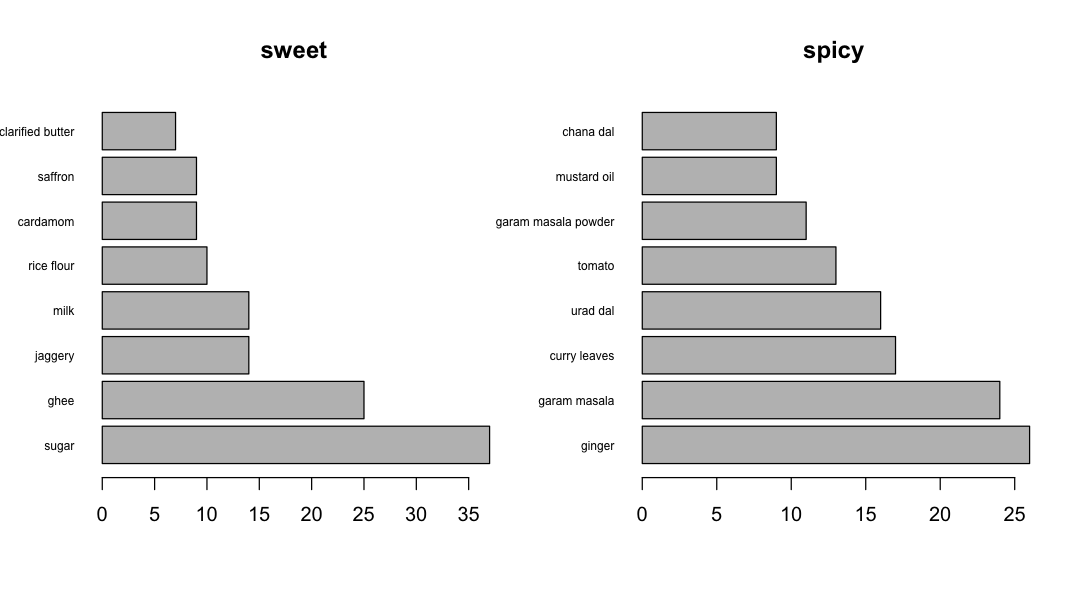

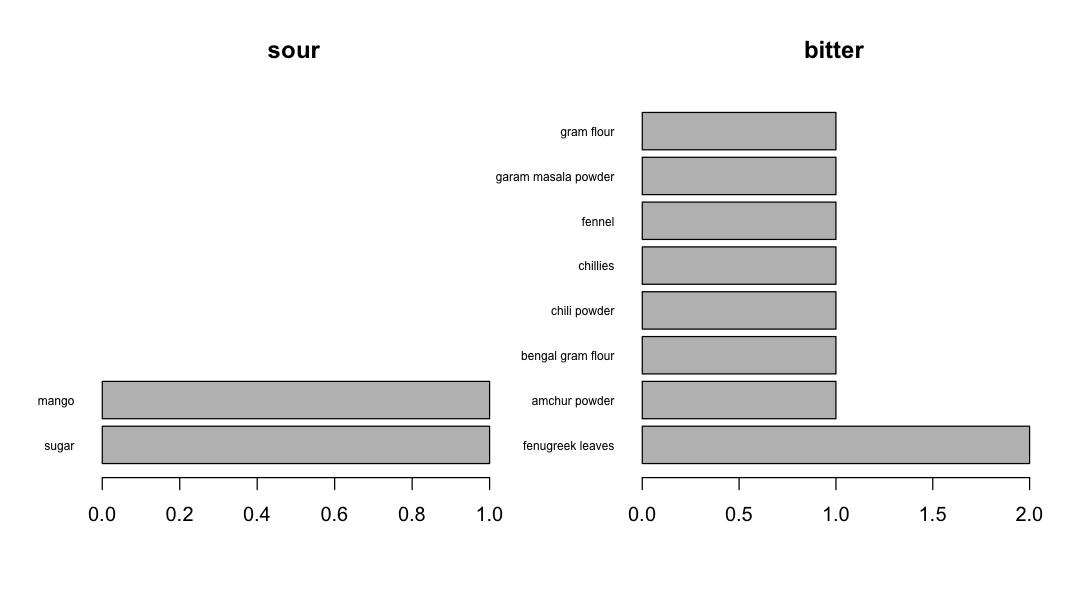

In [27]:
par(mfrow=c(1,2))

barplot(height=sweet_ingre$Freq[1:8],name= sweet_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="sweet")
barplot(height=spicy_ingre$Freq[1:8],name= spicy_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="spicy")
barplot(height=sour_ingre$Freq[1:8],name= sour_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="sour")
barplot(height=bitter_ingre$Freq[1:8],name= bitter_ingre$list_ingre[1:8],horiz=T, las=1, cex.names=.6, main="bitter")

#The las argument allows to change the orientation of the axis labels:
#0: always parallel to the axis
#1: always horizontal
#2: always perpendicular to the axis
#3: always vertical.

In [28]:
head(food_data[is.na(flavor_profile)])

name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
Chapati,"Whole wheat flour, olive oil, hot water, all purpose flour",vegetarian,10,10,NA,main course,Maharashtra,West
Naan,"Whole wheat flour, honey, butter, garlic",vegetarian,60,30,NA,main course,Punjab,North
Rongi,"Garam masala powder, tomato, kasuri methi, cinnamon, mustard oil",vegetarian,10,30,NA,main course,Punjab,North
Kanji,"Carrot, yellow mustard, red chilli, black salt",vegetarian,10,45,NA,snack,Kerala,South
Pachadi,"Coconut oil, cucumber, curd, curry leaves, mustard seeds",vegetarian,10,25,NA,main course,NA,South
Paniyaram,"Yogurt, ginger, curry leaves, baking soda, green chilli",vegetarian,10,20,NA,main course,Tamil Nadu,South


We can see that most of the dishes fall under the category of spicy and sweet flavor, so I keep that in mind when observing and imputing the values. As analyzed above, many dishes with NA flavor use curry leaves as its ingredients, so we are going to impute their flavors as spicy.

In [29]:
is_flavor<- function(x, string){
    lists<-get_top_ingredient_list(x)
    lists<-as.character(lists$list_ingre)
    lists<- lists[!is.na(lists)]
    if(any(lists %in% string)){
        return(TRUE)
    }else {
        return(FALSE)
    }
    
}
#sweet flavor
food_data$is_sweet<-sapply(food_data$ingredients, is_flavor, sweet_ingre$list_ingre)
food_data[is.na(flavor_profile) & is_sweet ==T]$flavor_profile <- "sweet"
#spicy flavor
food_data$is_spicy<-sapply(food_data$ingredients, is_flavor, spicy_ingre$list_ingre)
food_data[is.na(flavor_profile) & is_spicy ==T]$flavor_profile <- "spicy"

In [30]:
food_data[is.na(flavor_profile)][c(1,3,8),]$flavor_profile <- "spicy"

In [31]:
food_data[is.na(flavor_profile)]$flavor_profile <- "sweet"

In [32]:
colSums(is.na(food_data))

name    ingredients           diet      prep_time      cook_time 
             0              0              0              0              0 
flavor_profile         course          state         region       is_sweet 
             0              0             20             11              0 
      is_spicy 
             0

After dealing with the food, I come to the geographical variables, looking at the data, I can see that there are some dishes, such as rice, that have NA values in its region/state. These dishes might not belong solely to any specific region/state, but rather, to many states/regions. It makes sense to put the values of these instances to indicate so, for the benefit of analysis

In [33]:
food_data$state <- factor(food_data$state, levels = c(levels(food_data$state), "multiple states"))
levels(food_data$state)

[1] "Andhra Pradesh"  "Assam"           "Bihar"           "Chhattisgarh"   
 [5] "Goa"             "Gujarat"         "Haryana"         "Jammu & Kashmir"
 [9] "Karnataka"       "Kerala"          "Madhya Pradesh"  "Maharashtra"    
[13] "Manipur"         "NCT of Delhi"    "Nagaland"        "Odisha"         
[17] "Punjab"          "Rajasthan"       "Tamil Nadu"      "Telangana"      
[21] "Tripura"         "Uttar Pradesh"   "Uttarakhand"     "West Bengal"    
[25] "multiple states"

In [34]:
food_data[is.na(state)]$state <- "multiple states"

In [35]:
food_data$region <- factor(food_data$region, levels = c(levels(food_data$region), "multiple regions"))
levels(food_data$region)

[1] ""                 "Central"          "East"             "North"           
[5] "North East"       "South"            "West"             "multiple regions"

In [36]:
food_data[is.na(region)]$region <- "multiple regions"

### Findings

I will use graphs to explore the relationship between different variables

#### Within regions and states

There are 10 states in India that are home to 83% of the number of dishes. The number of dishes in each of these states are depicted below, along with the breakdown of what type of flavors are prevalent in these states. Overall, there are some of the notable features
- There are only 2 states that have an obvious larger number of sweet dishes as compared to spicy dishes, West Bengal and Andhra Pradesh. 
- Only Gujarat has dishes in all 4 flavor, it must be a diverse state cuisine-wise. Punjab's dishes have 3 types of flavors. These are two states with the most dishes
- There are a fair number of dishes that appear in many states. The majority of these dishes are main course and dessert

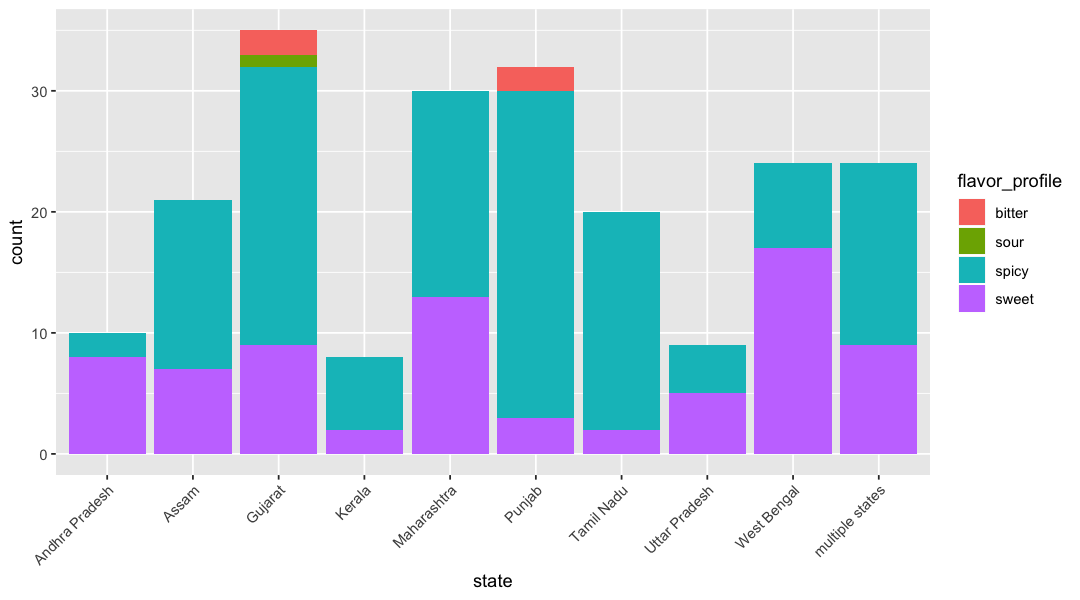

In [37]:
plot <- names(sort(desc(table(food_data$state)))[1:10])
food_data %>%
filter(state %in% plot) %>%
ggplot(aes(x=state))+
    geom_bar(aes(fill=flavor_profile))+
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))

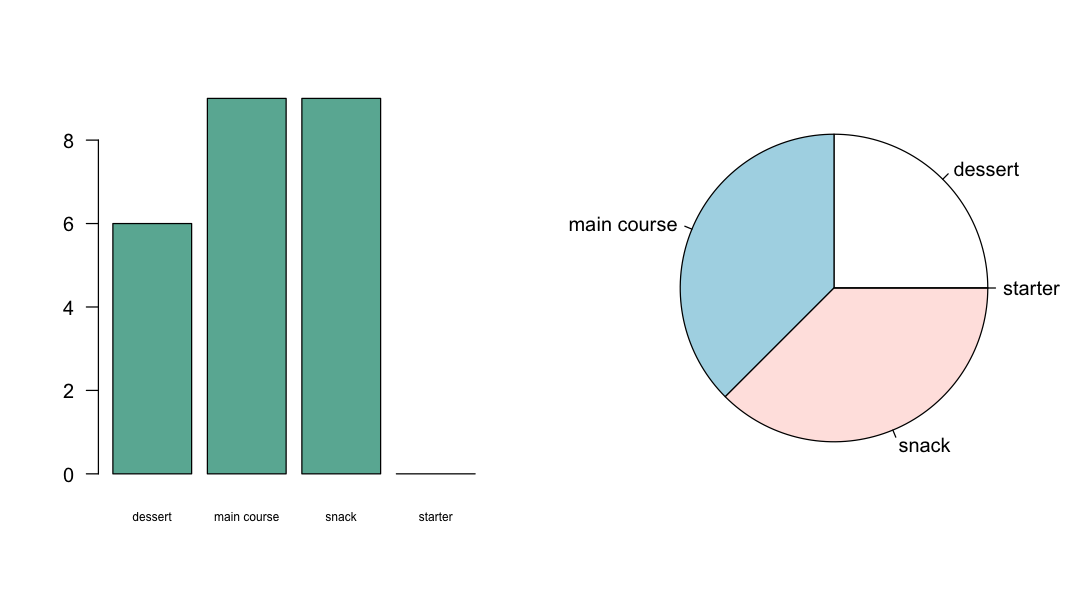

In [38]:
library(repr)
options(repr.plot.width=9, repr.plot.height=5)
par(mfrow=c(1, 2))
barplot(table(food_data[state=="multiple states"]$course), width=5, col="#69b3a2", las=1, cex.names=.6)
pie(table(food_data[state=="multiple states"]$course), radius=2)

On the regional level, spicy flavor also greatly outnumbers sweet flavors. The North, West and South regions contribute the most dishes to Indian cuisine. 

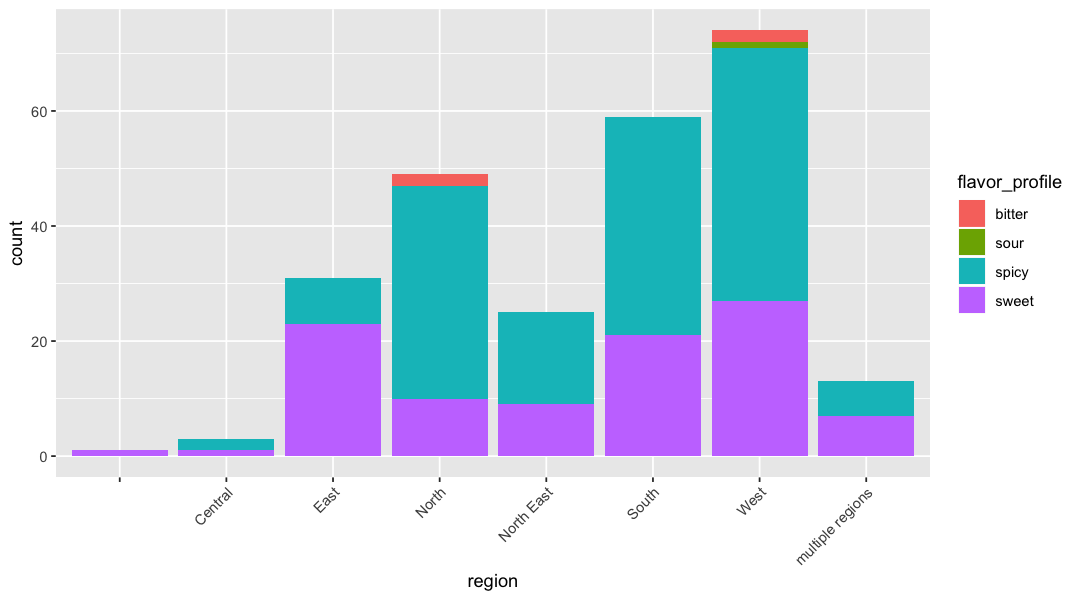

In [39]:
food_data %>%
ggplot(aes(x=region))+
    geom_bar(aes(fill=flavor_profile))+
    theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))